In [1]:
import numpy as np
import pandas as pd

import random
from sklearn.cluster import *


def test(file_name):
    data_set = pd.read_csv('/home/mytrah-pc/Mytrah_Adithya/data_turbine/' + file_name)
    required_data = data_set[['ActivePower', 'WindSpeed']].copy()

    required_data = required_data[required_data['ActivePower'] > 0]
    max_wind_speed = required_data['WindSpeed'].max()
    min_wind_speed = required_data['WindSpeed'].min()
    max_active_power = required_data['ActivePower'].max()
    min_active_power = required_data['ActivePower'].min()
    normalization_factor_wind_speed = max_wind_speed - min_wind_speed
    normalization_factor_active_power = max_active_power - min_active_power
    scale_factor_wind_speed = 4.0/3
    scale_factor_active_power = 1

    required_data['ScaledWindSpeed'] = ((required_data['WindSpeed'] - min_wind_speed) * scale_factor_wind_speed) \
                                        / normalization_factor_wind_speed
    required_data['ScaledActivePower'] = ((required_data['ActivePower'] - min_active_power) * scale_factor_active_power) \
                                        / normalization_factor_active_power

    required_data['cluster_number'] = -2

    clustering_algorithm = DBSCAN(
        eps=0.3/20,
        min_samples=15
    )

    required_data['cluster_number'] = clustering_algorithm.fit_predict(required_data[['ScaledWindSpeed', 'ScaledActivePower']])

    r = lambda: random.randint(0,255)
    random_color = lambda: '#%02X%02X%02X' % (r(),r(),r())

    import matplotlib.pyplot as plt
    plt.figure(figsize=(30,15))

    max_elements_cluster = -2
    max_elements = 0
    for group in required_data.groupby('cluster_number'):
        if(group[1].shape[0] > max_elements):
            max_elements = group[1].shape[0]
            max_elements_cluster = group[0]
        plt.scatter(
            group[1]['ScaledWindSpeed'],
            group[1]['ScaledActivePower'],
            c=random_color(),
            s=np.pi*(2**2)
        )

    from scipy.optimize import curve_fit

    filter1 = required_data[required_data['cluster_number'] == max_elements_cluster]
    filter2 = filter1[(filter1['ScaledActivePower'] > 0.03) & (filter1['ScaledActivePower'] < 0.99)]


    def a_sig(x, d, c):
        return 1/(1 + np.exp(-d * x + c))


    
    if filter2['ScaledWindSpeed'].shape[0] > 0:
        popt, pcov = curve_fit(a_sig, filter2['ScaledWindSpeed'], filter2['ScaledActivePower'])

        x = np.linspace(0, scale_factor_wind_speed)
        y = a_sig(x, popt[0], popt[1]) - 0.1

        plt.plot(x, y, 'r-')



    plt.show()

ScatterData_Kaladonger_KD29.csv


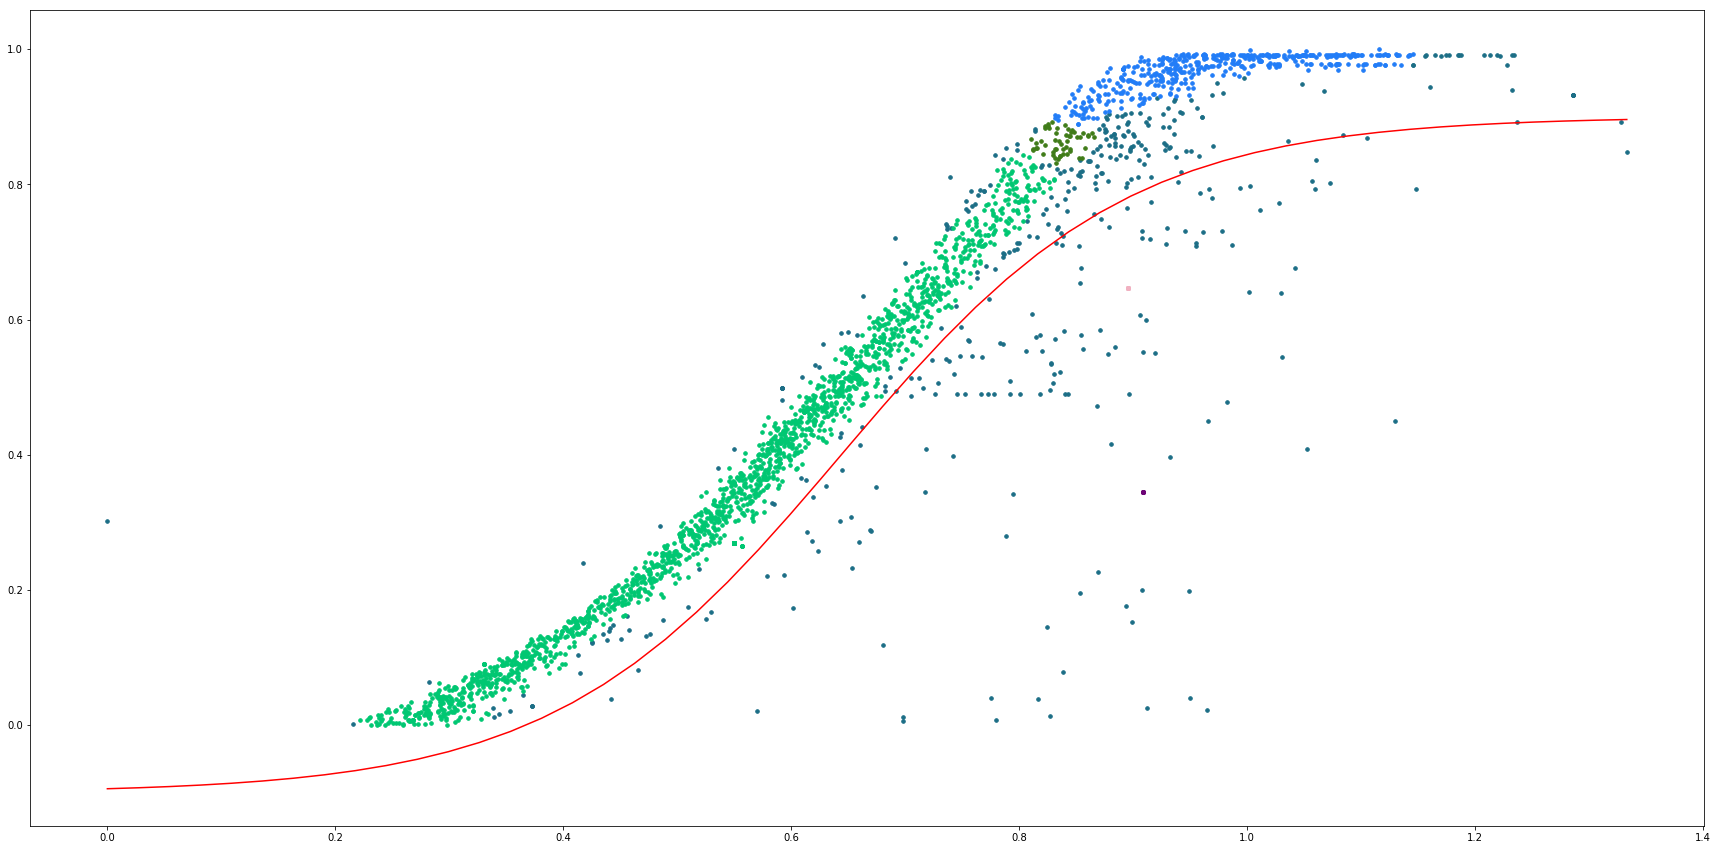

ScatterData_Kaladonger_KD07.csv


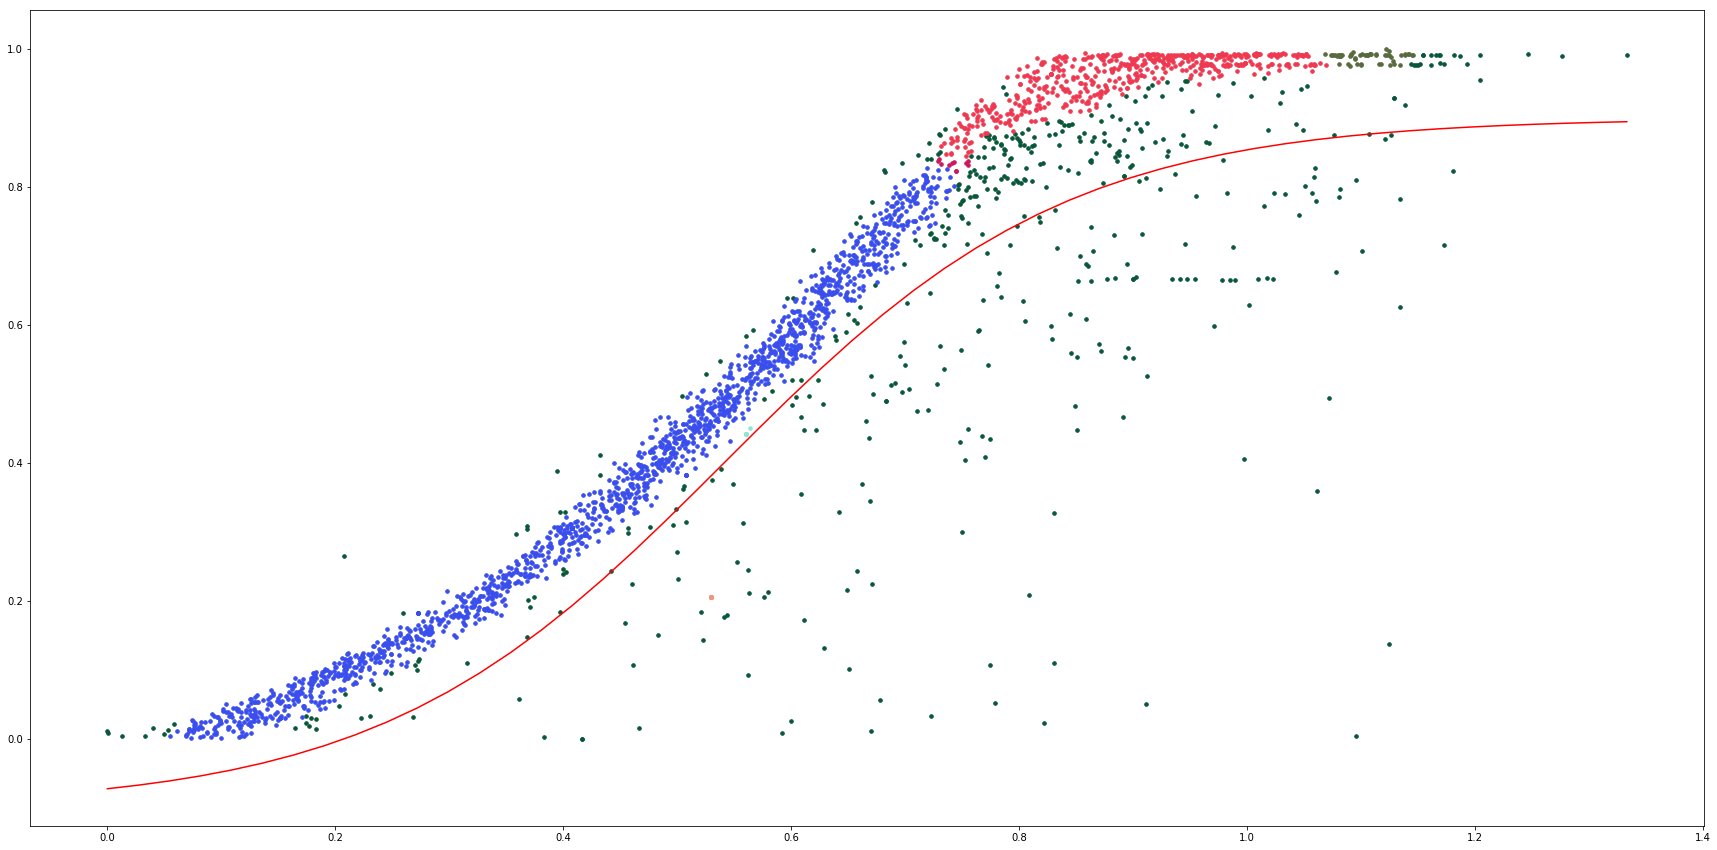

ScatterData_Mokal_MK066.csv


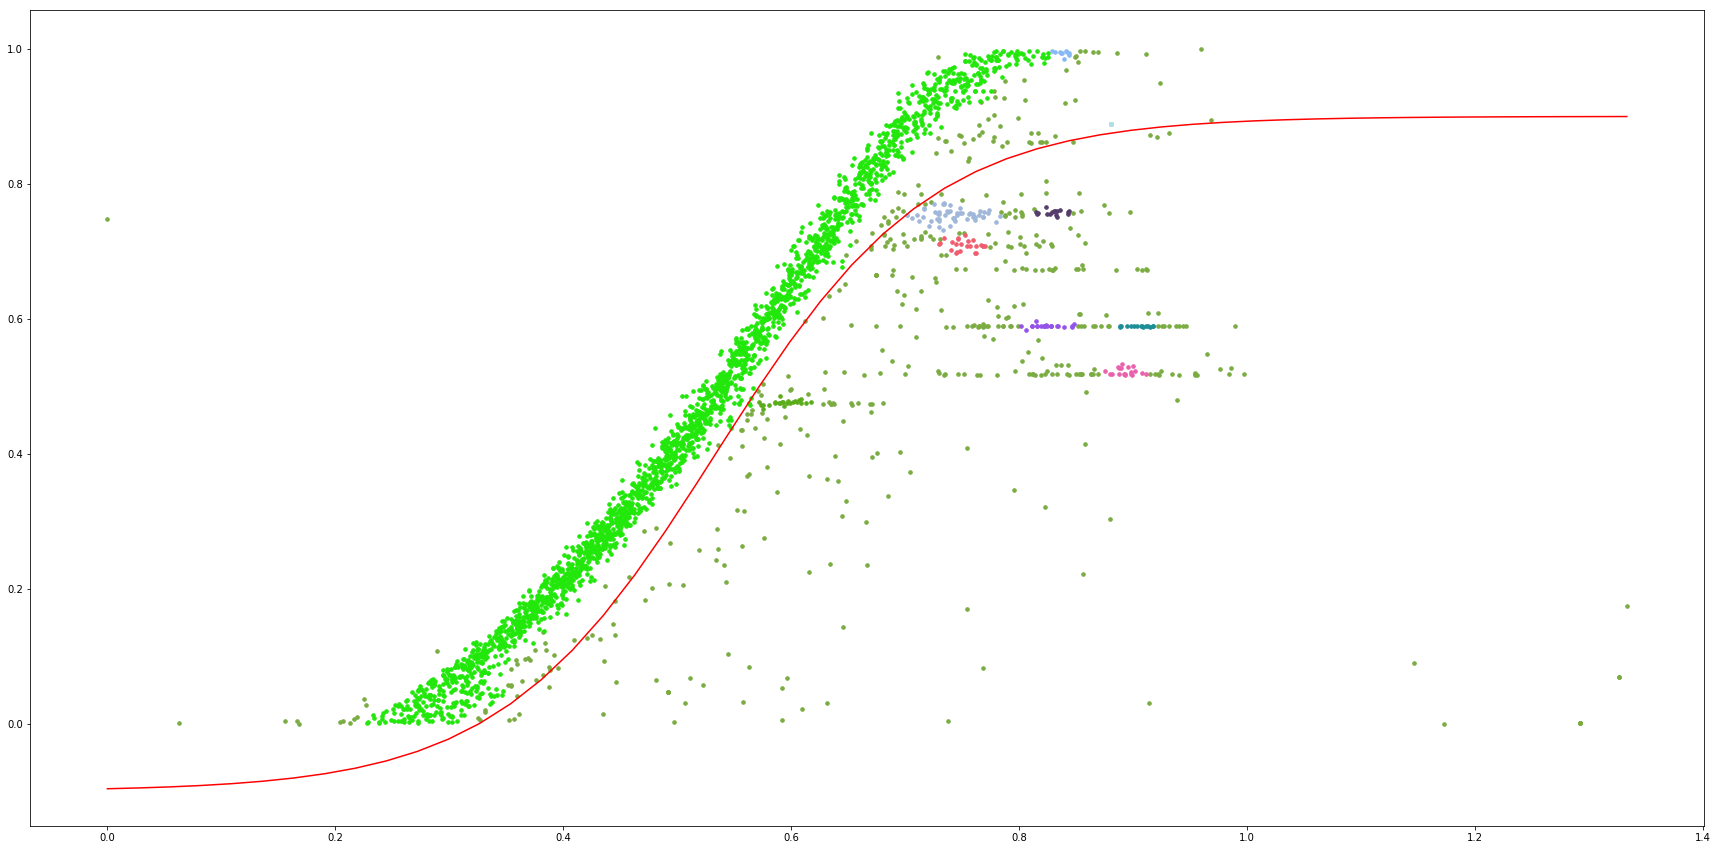

ScatterData_Mokal_MK014.csv


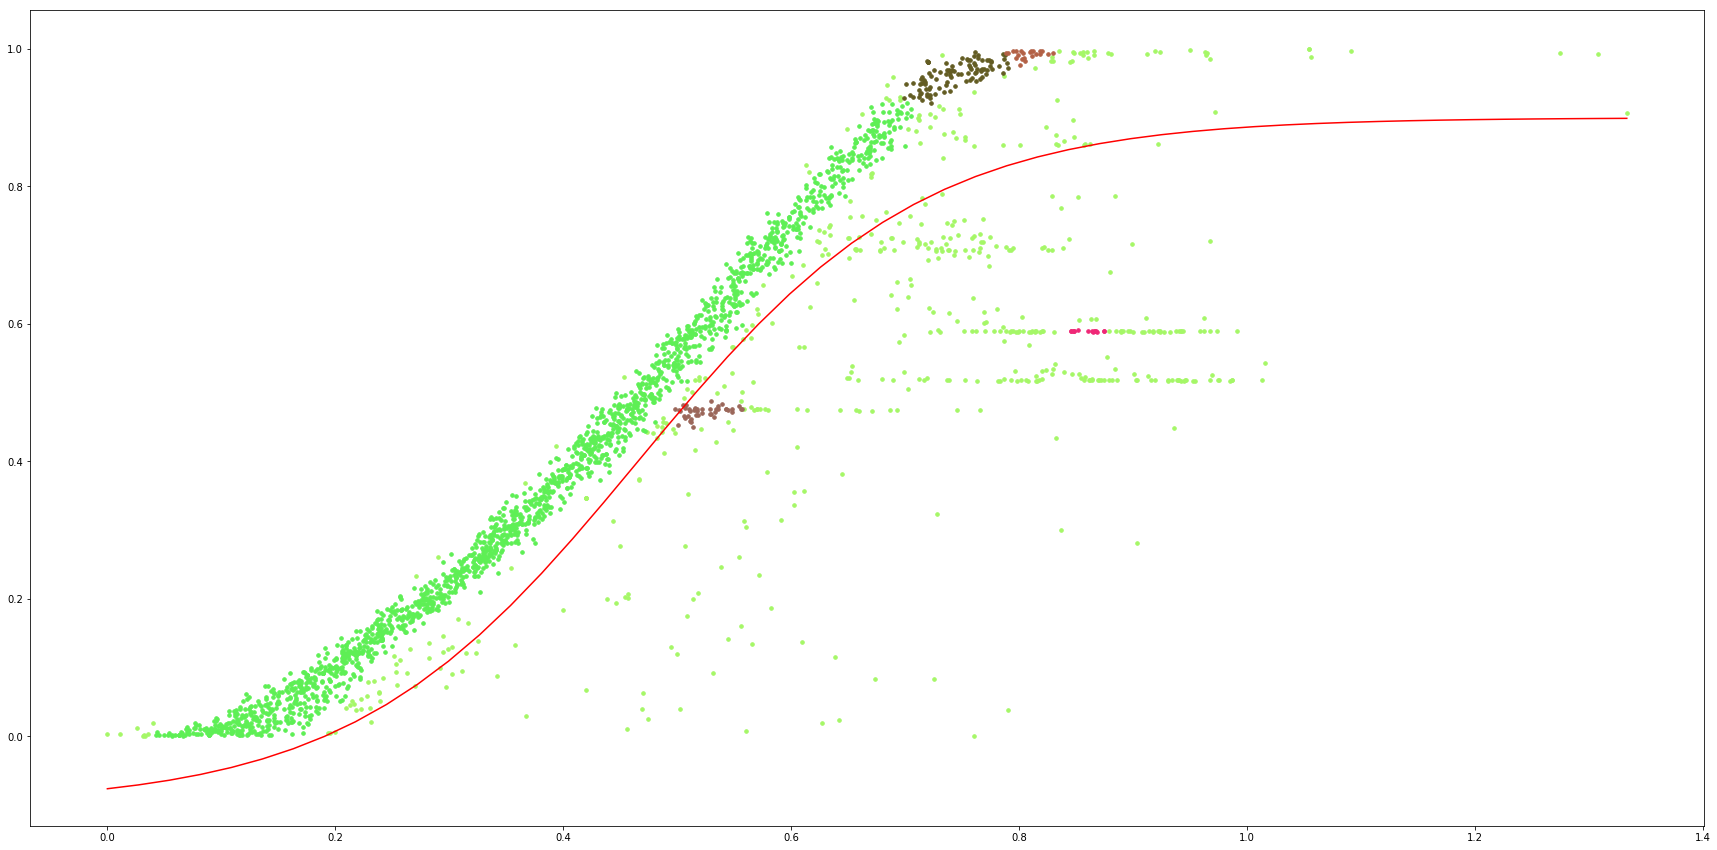

ScatterData_Nidhi_NDH-047.csv


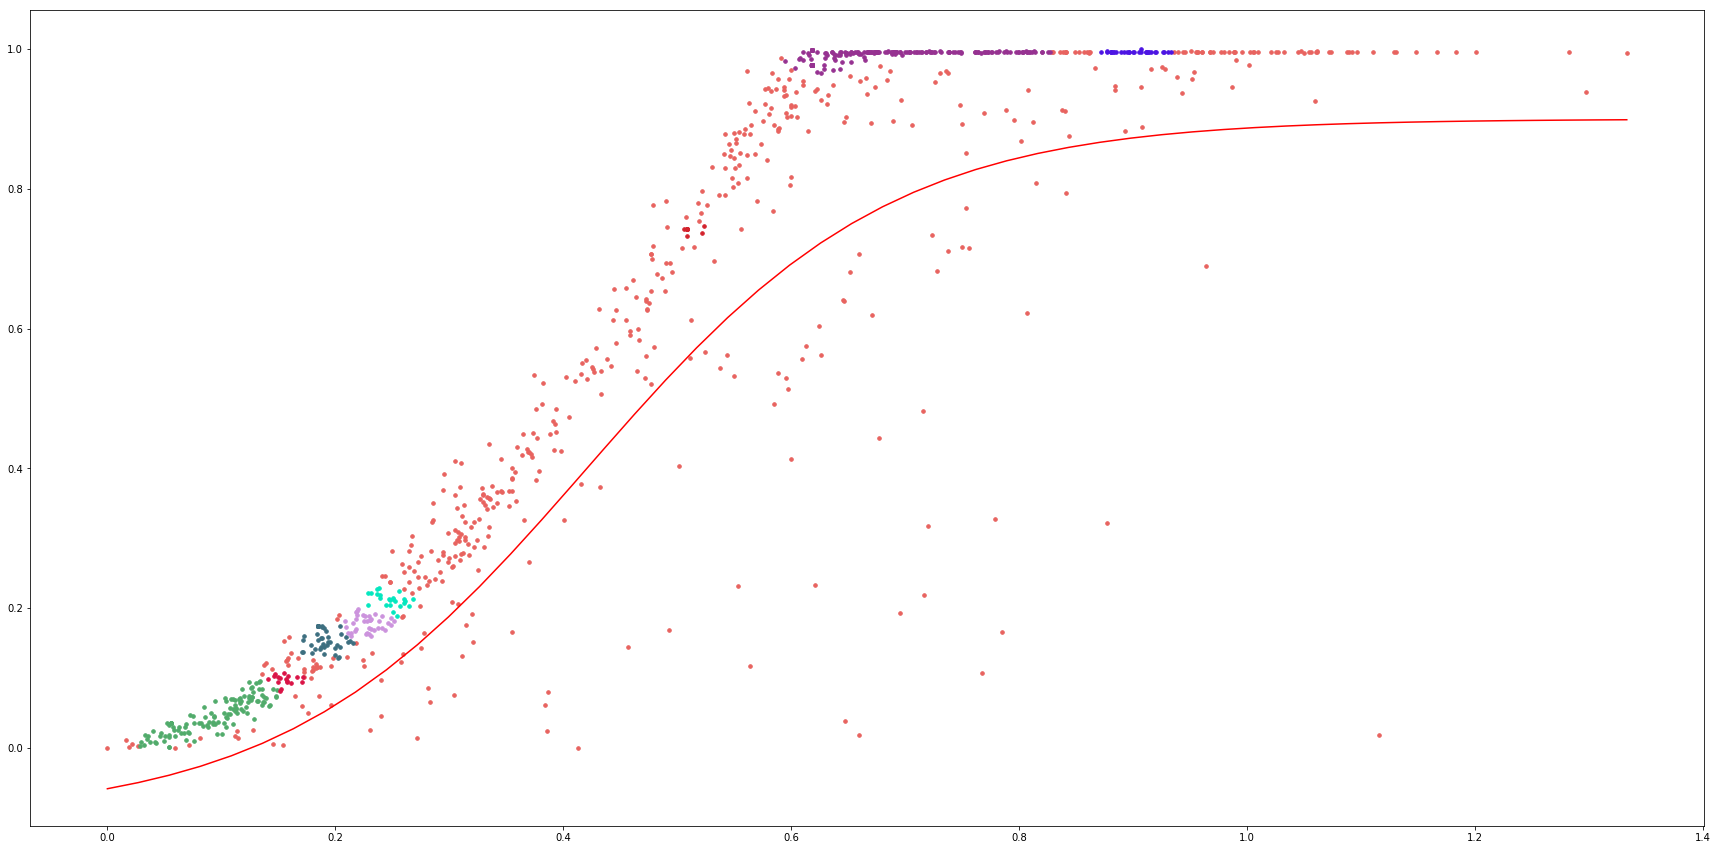

ScatterData_Mahidad_JSD38.csv


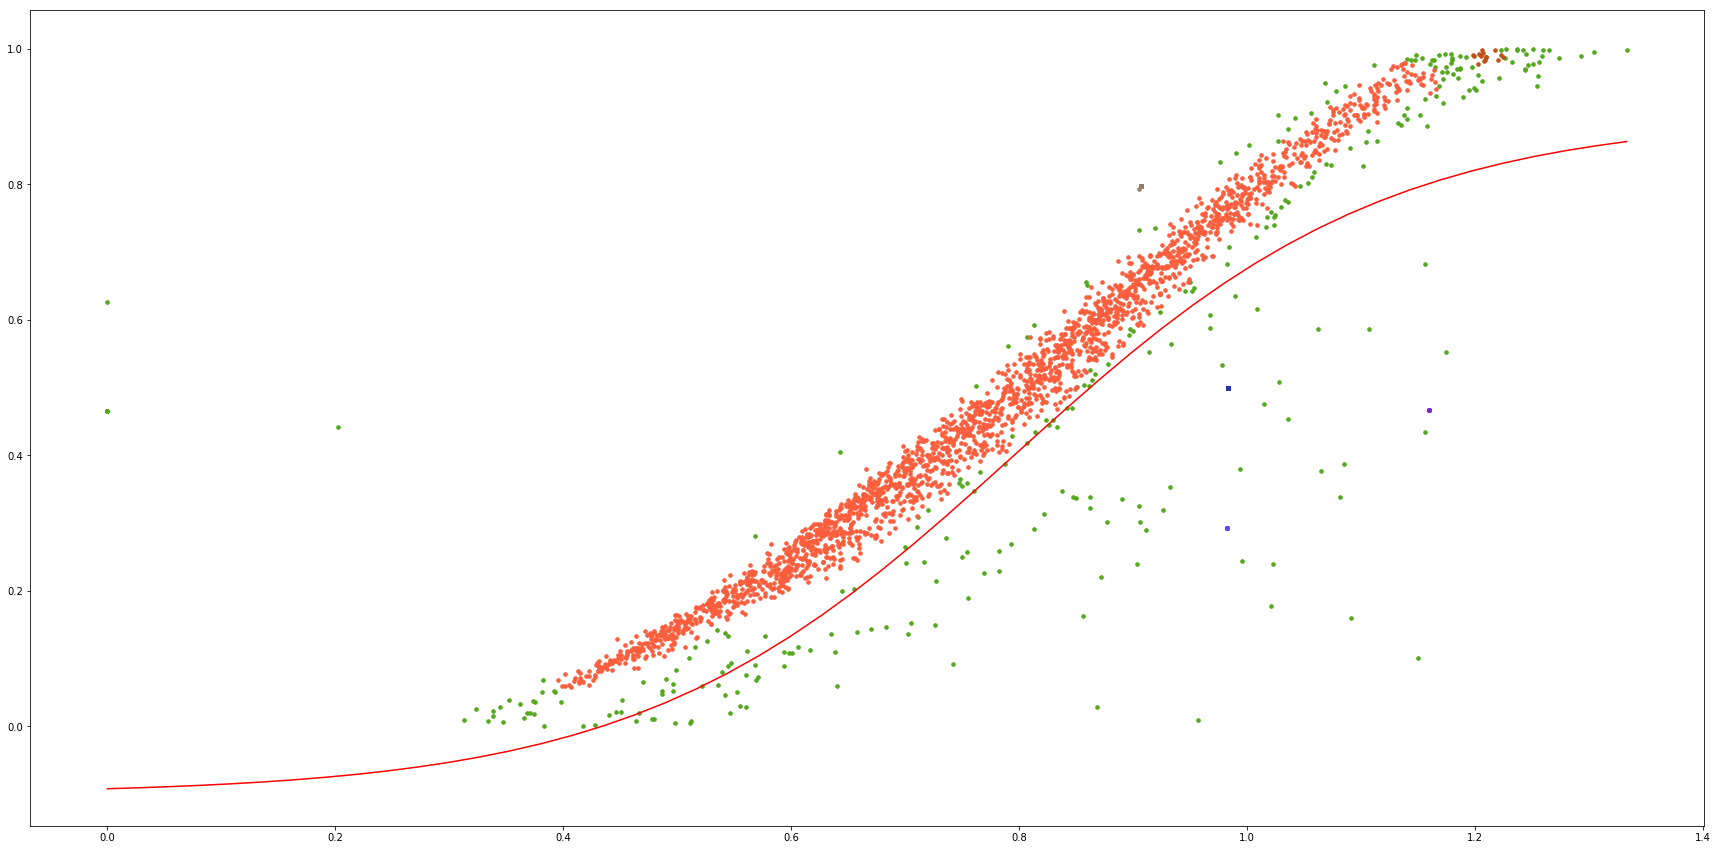

ScatterData_Vajrakarur_VAR205_1.csv


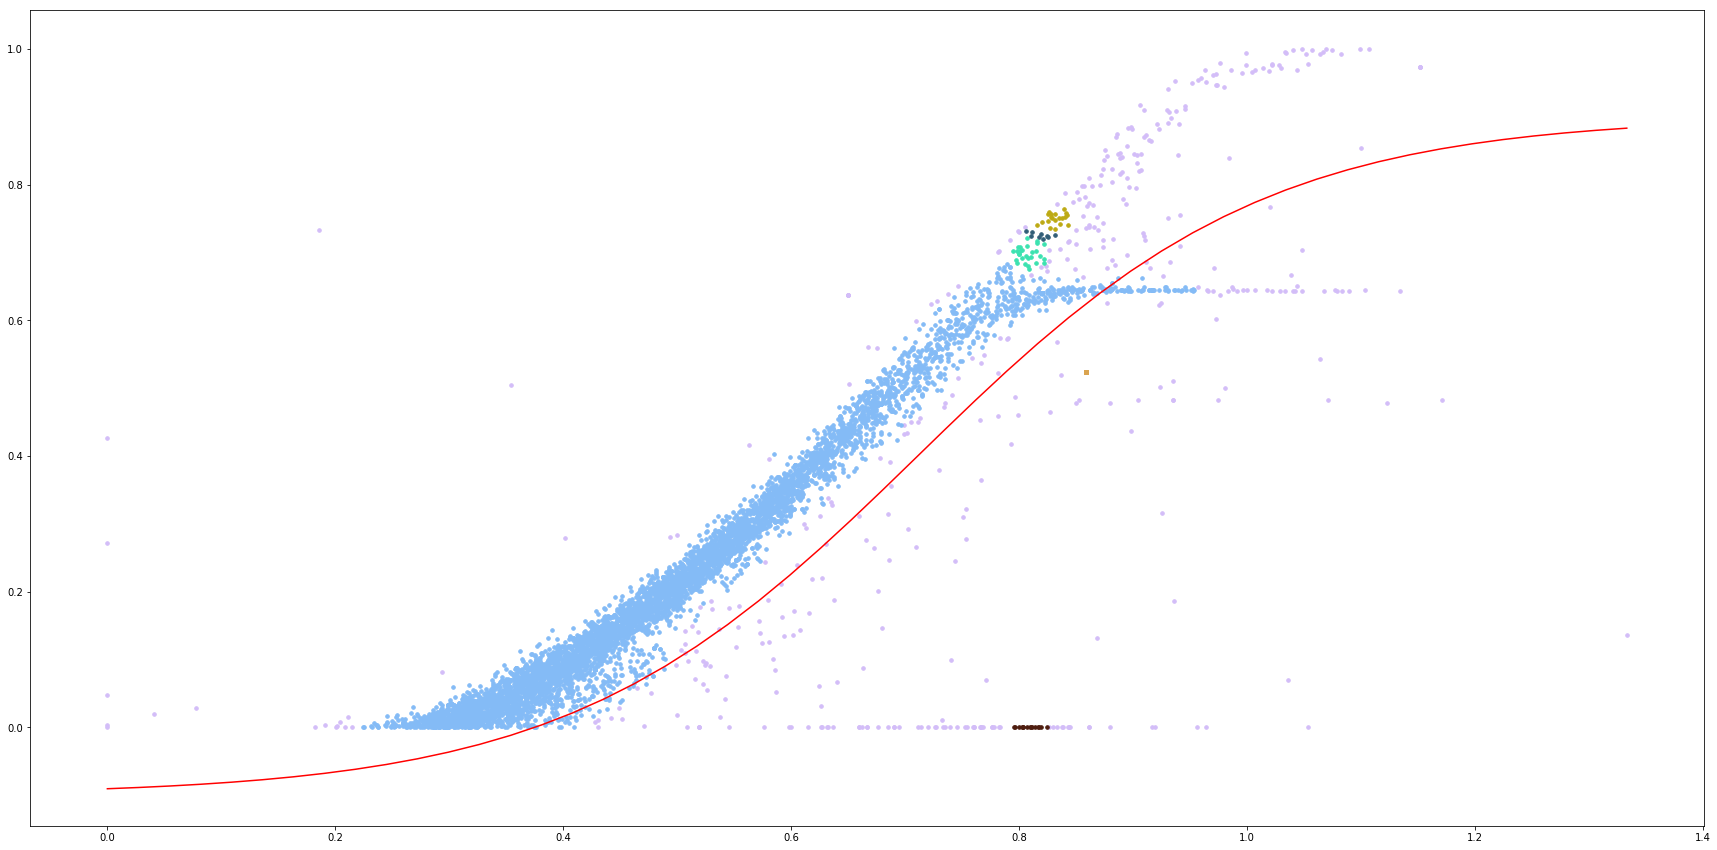

ScatterData_Vajrakarur_VAR205.csv


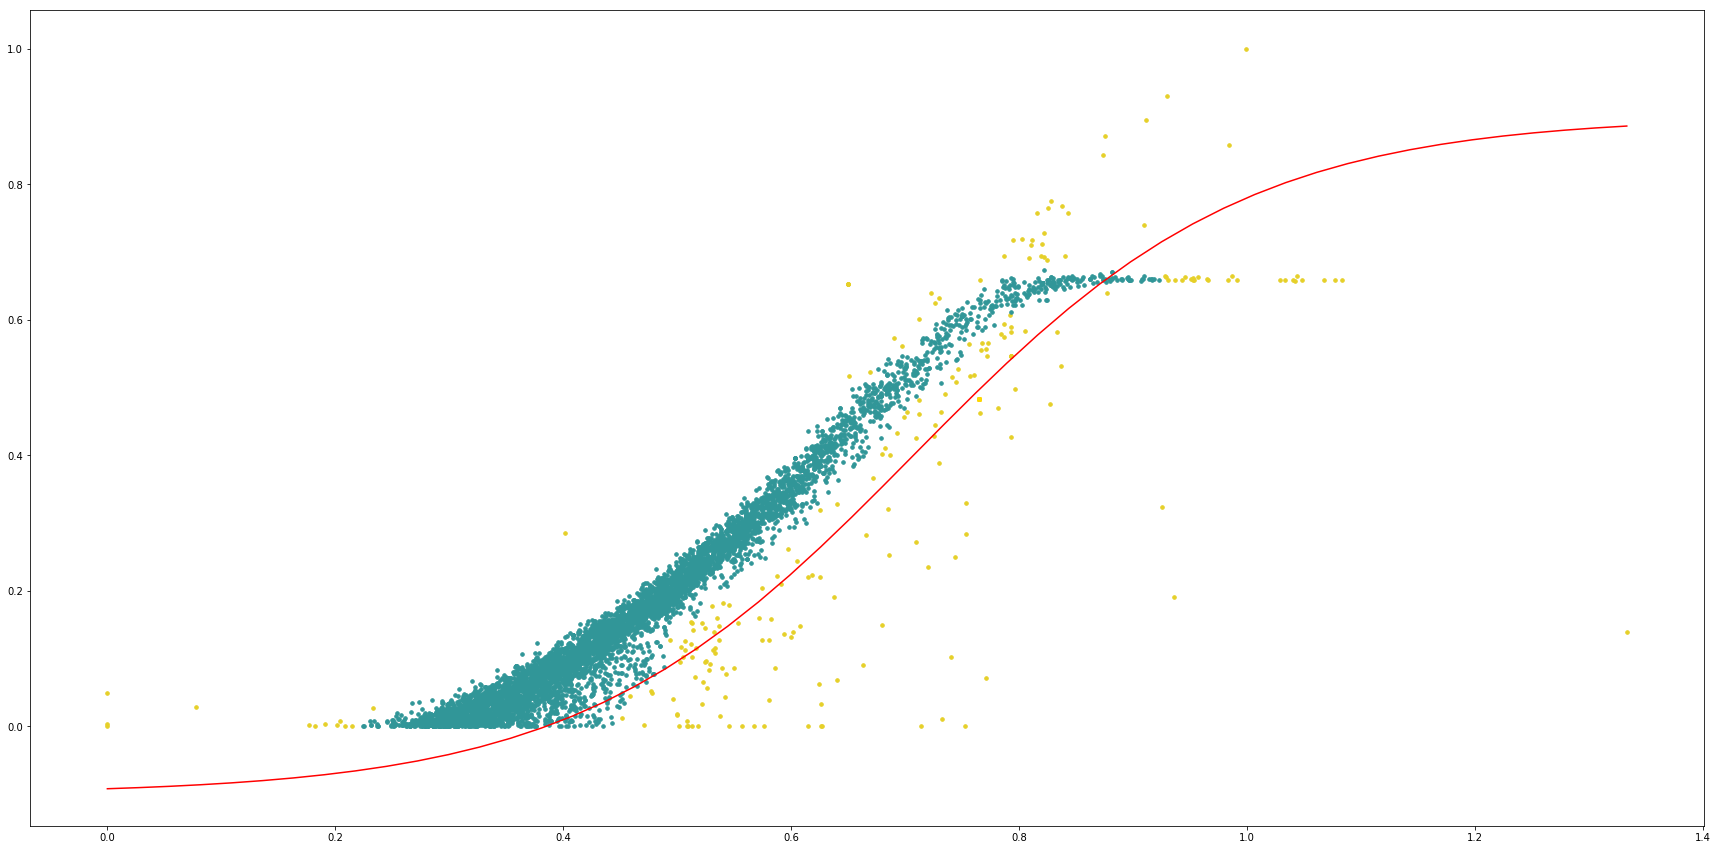

ScatterData_Nidhi_NDH-022.csv


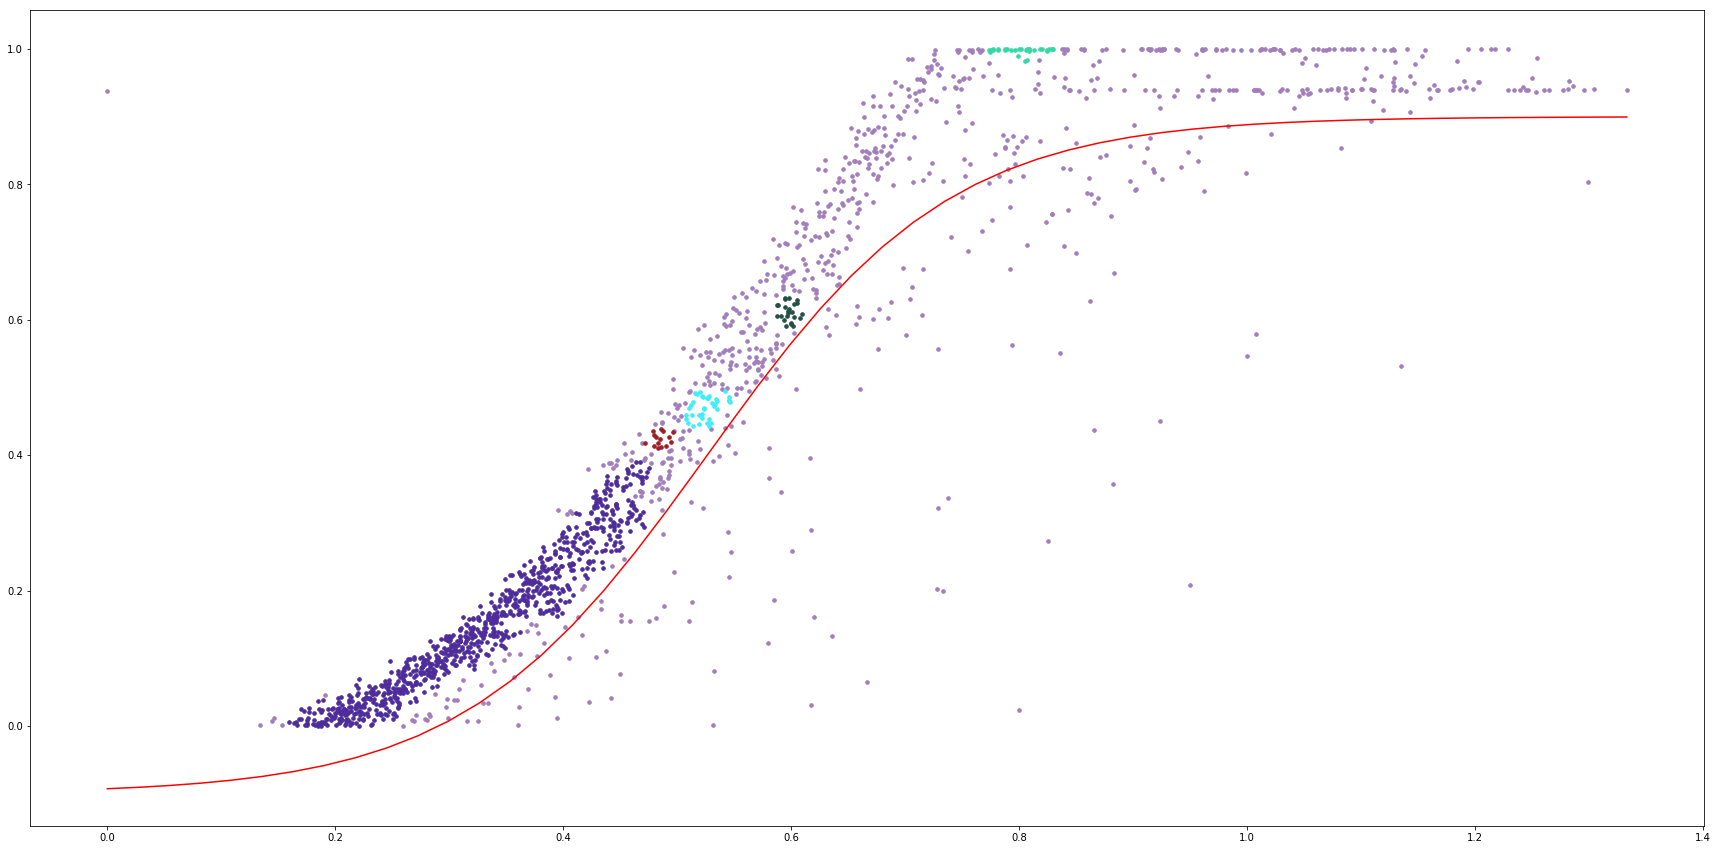

ScatterData_Chakla_C66.csv


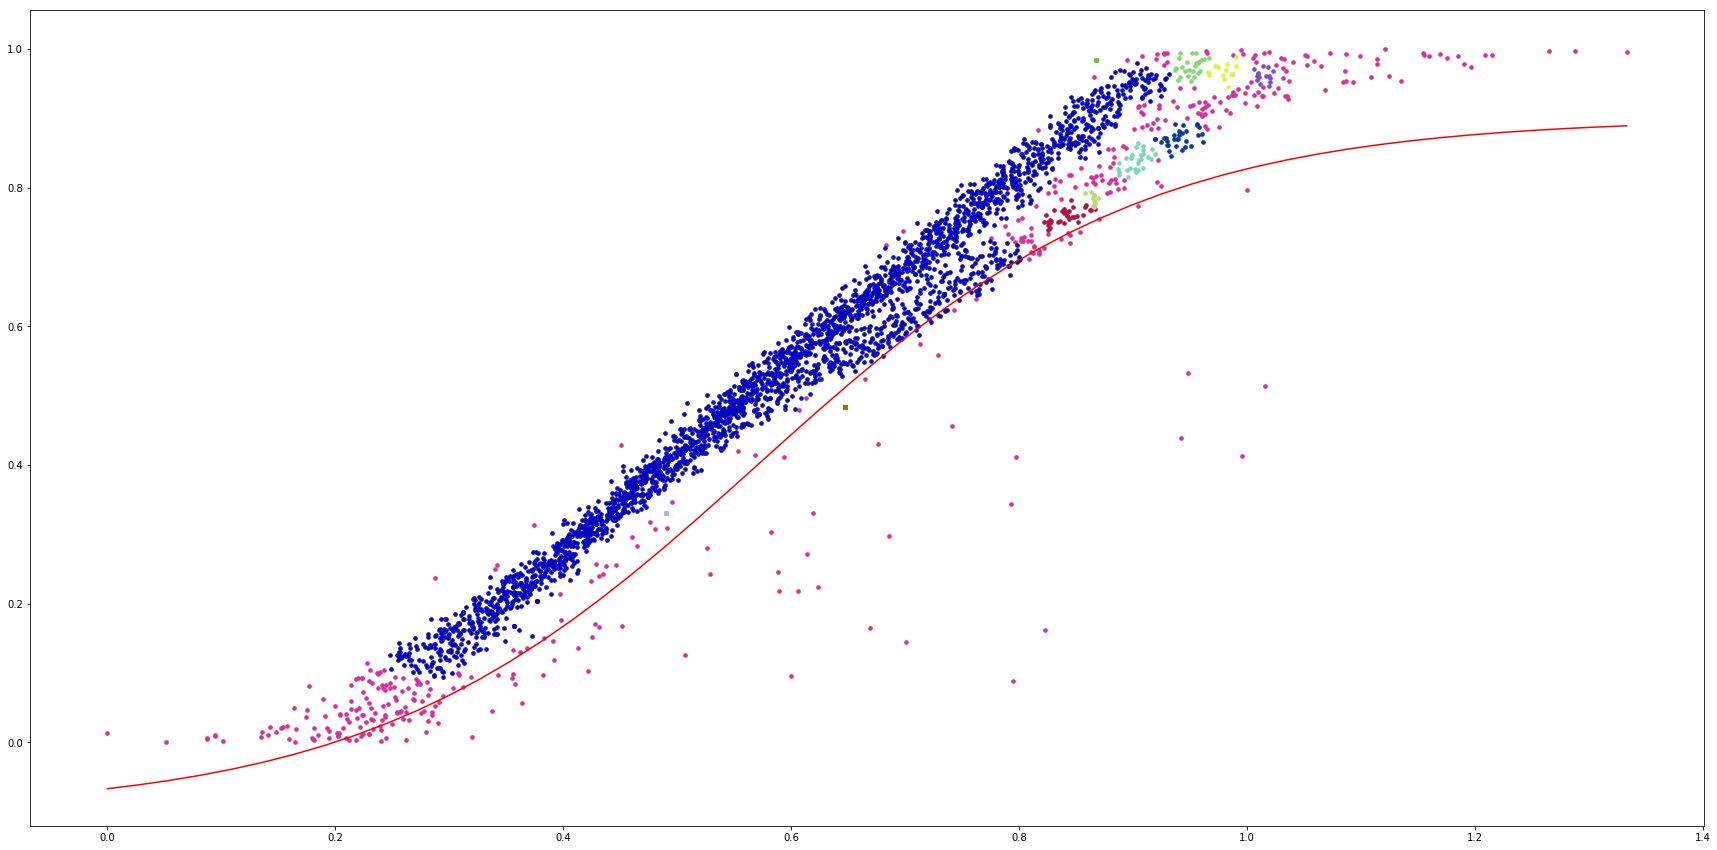

ScatterData_Kaladonger_KD54.csv


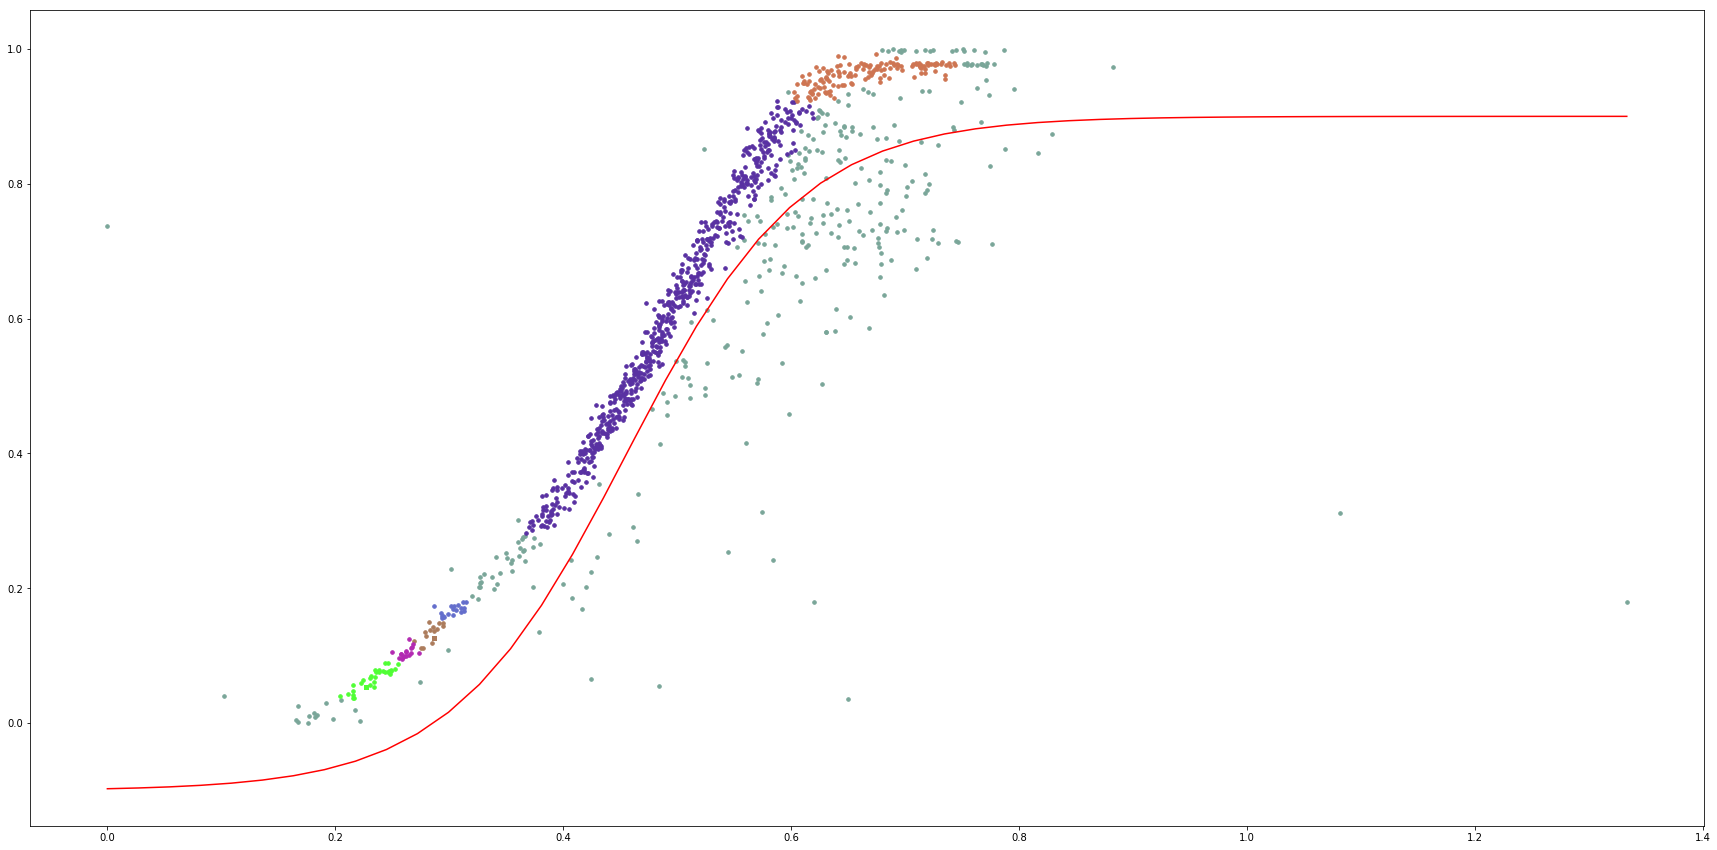

ScatterData_Bhesada_RSA055.csv


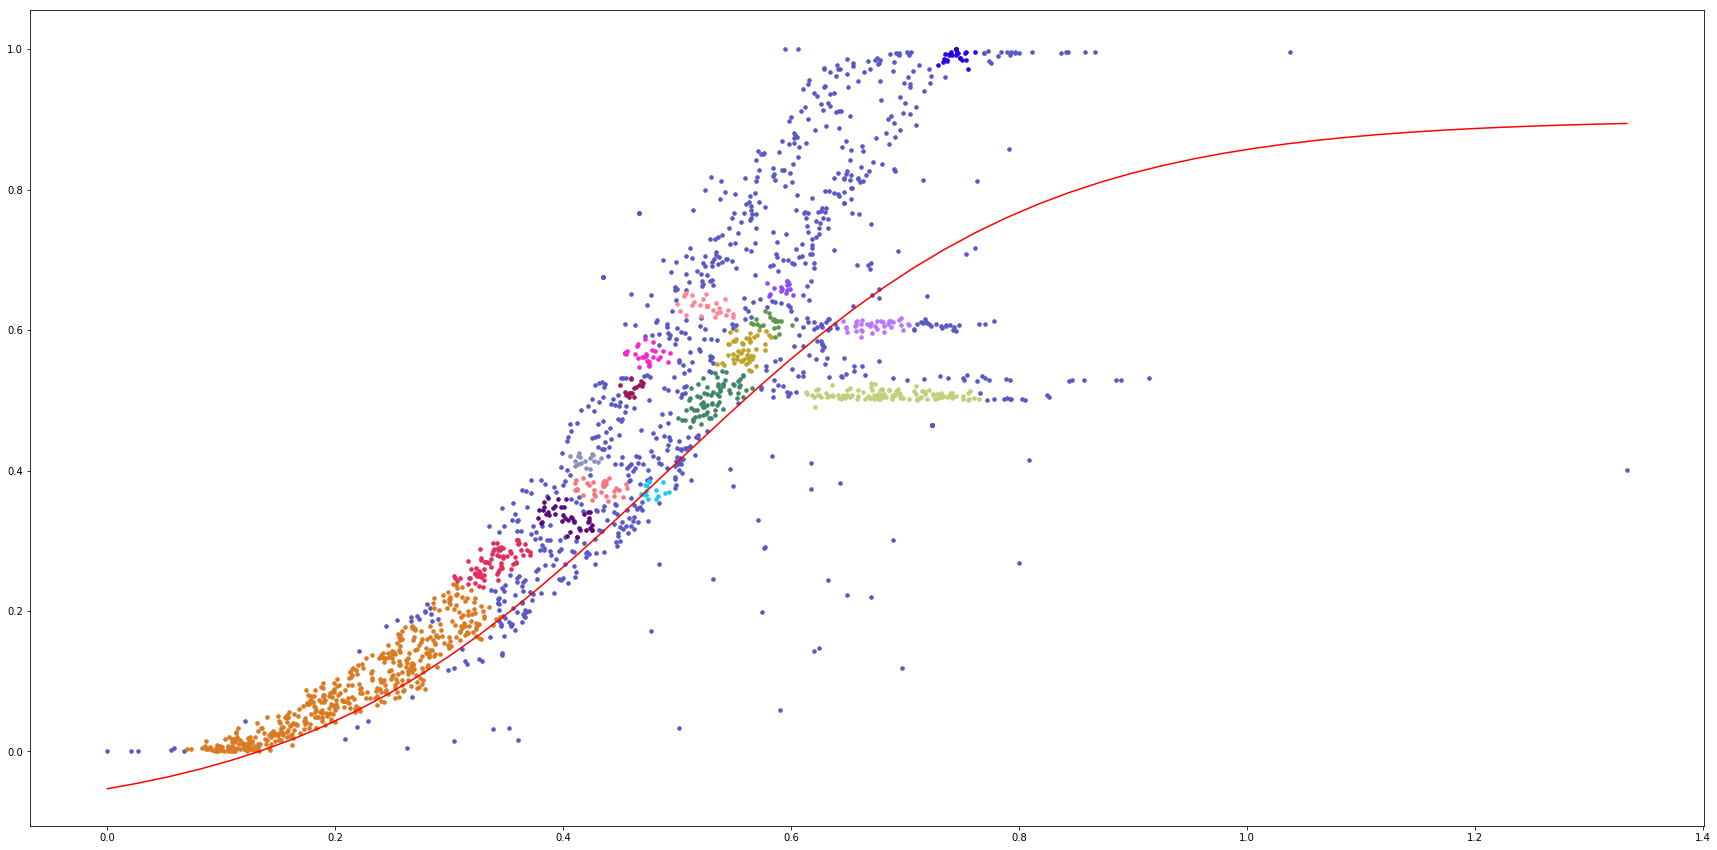

ScatterData_Kaladonger_KD61.csv


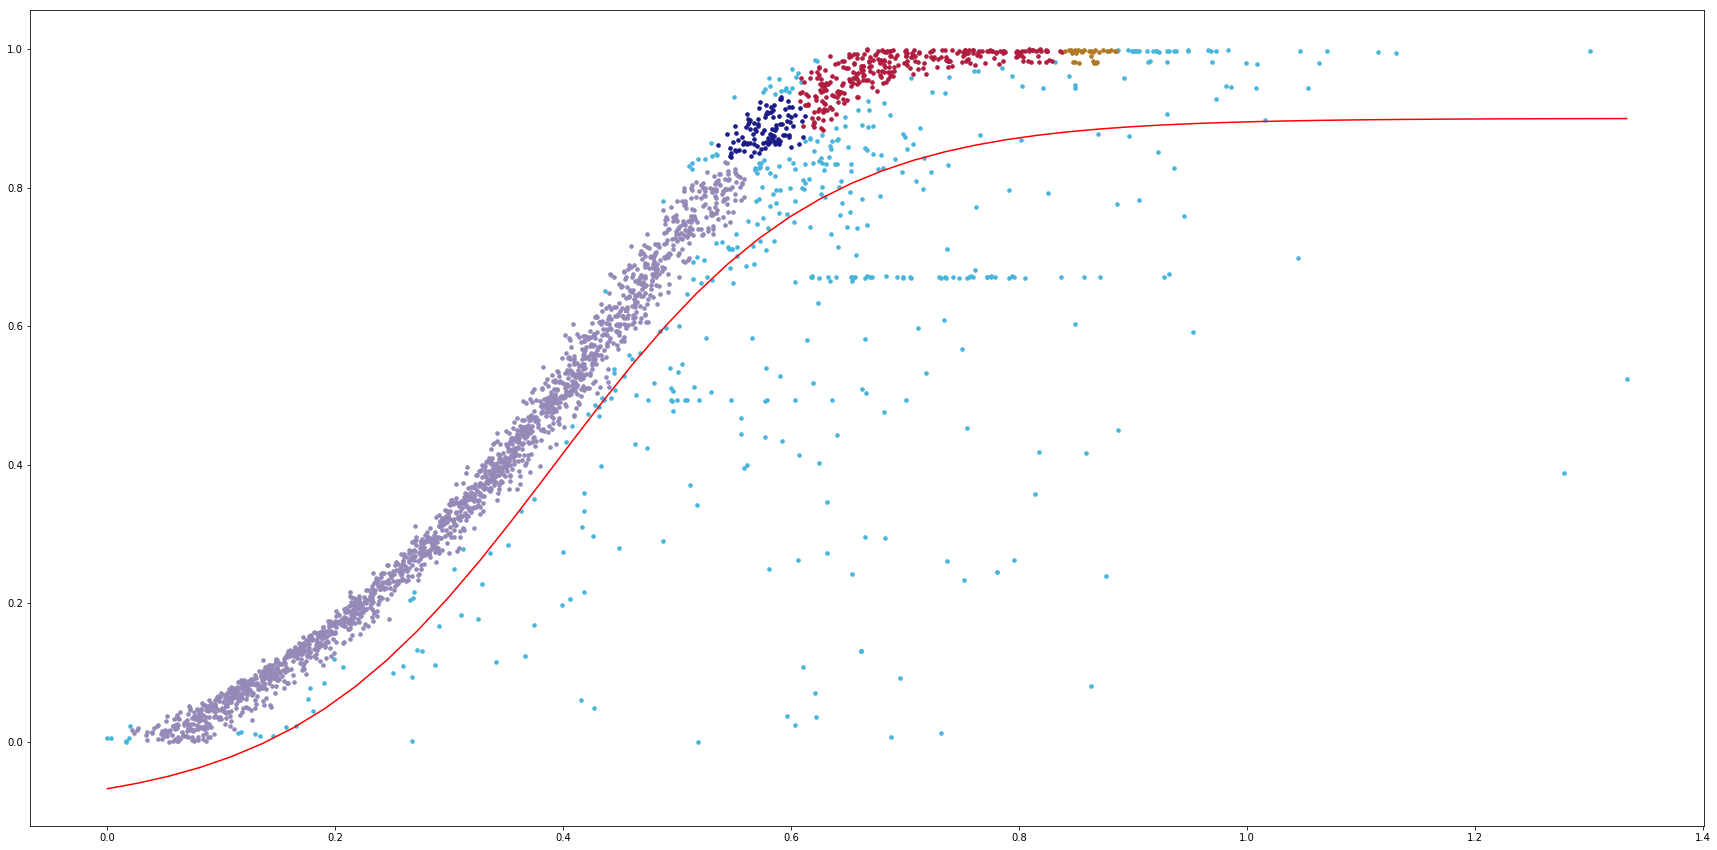

ScatterData_Bhesada_RSA058.csv


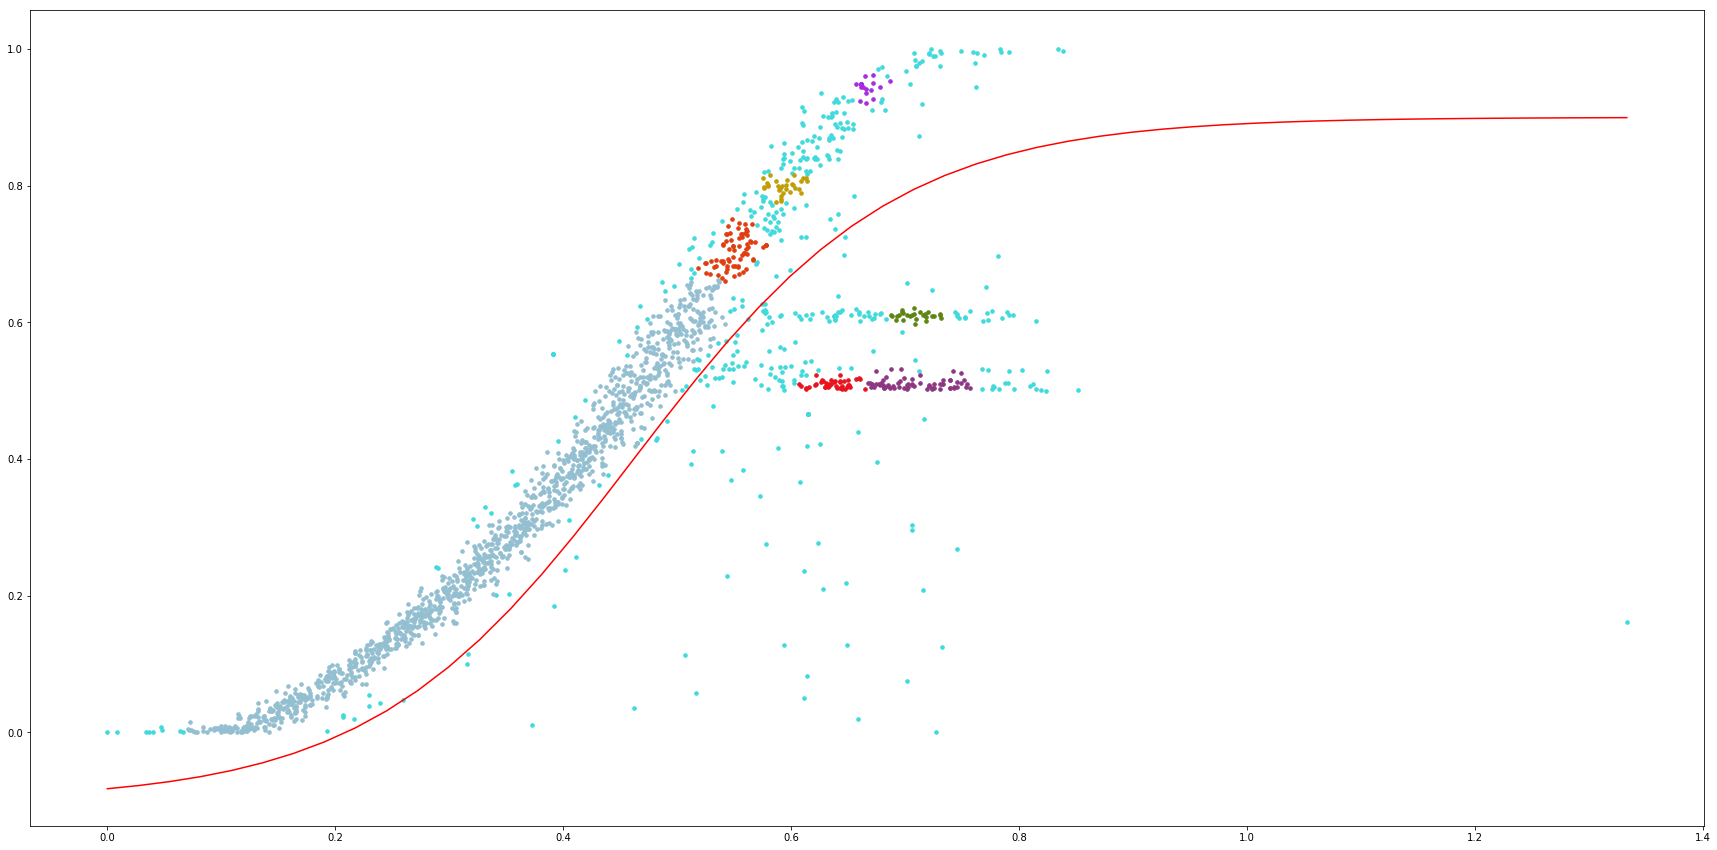

ScatterData_Nazeerabad_NRB01.csv


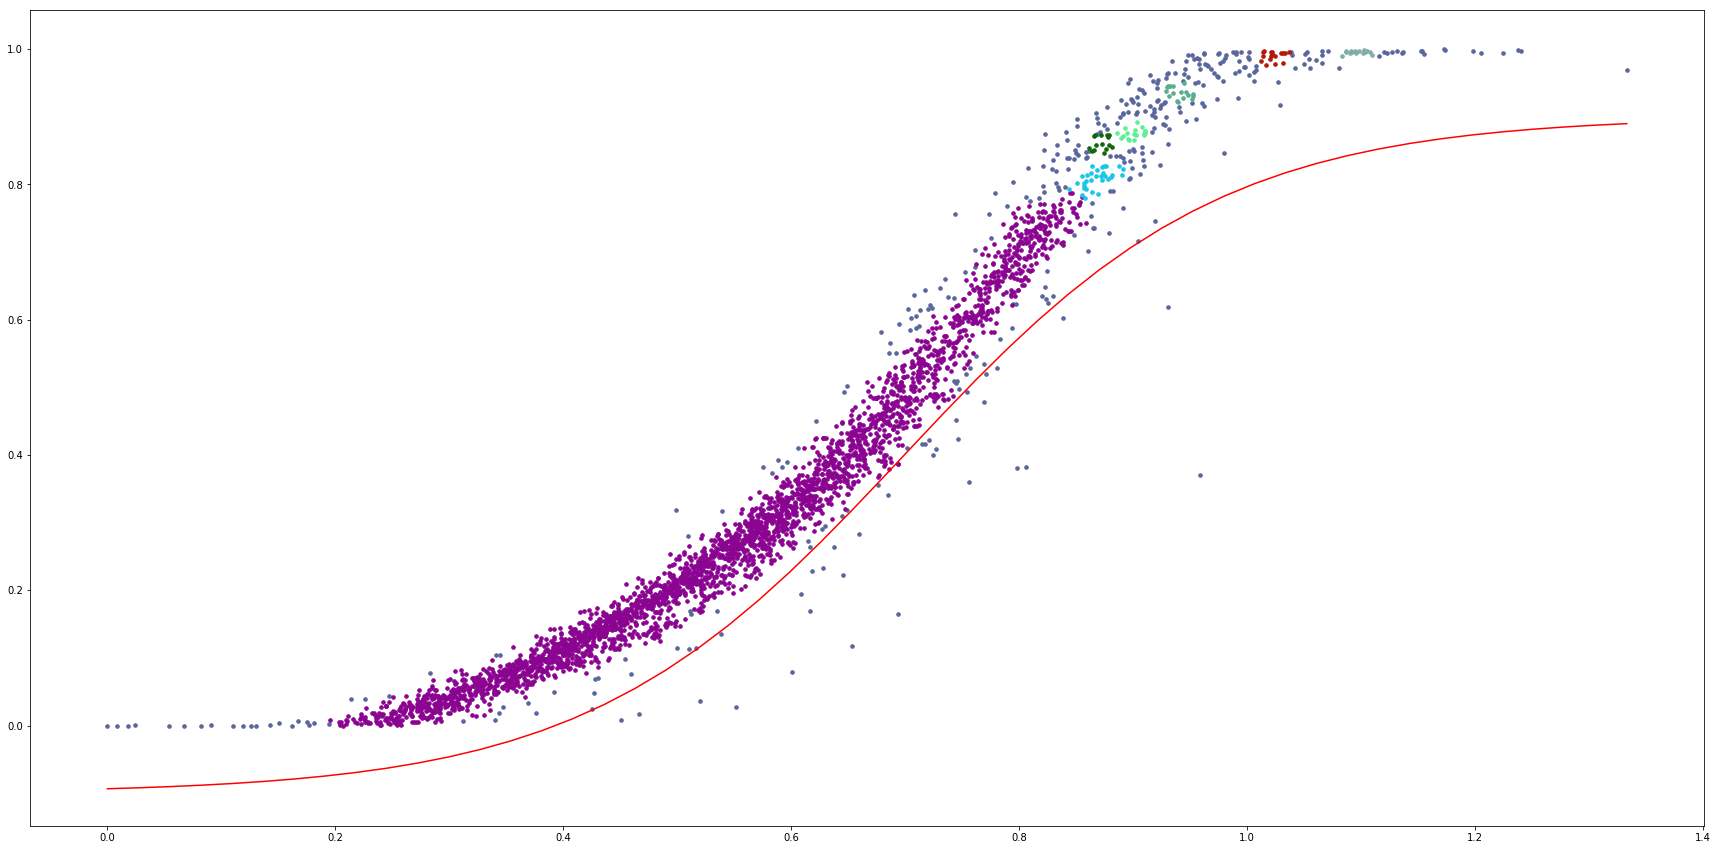

ScatterData_Vajrakarur_VAR208.csv


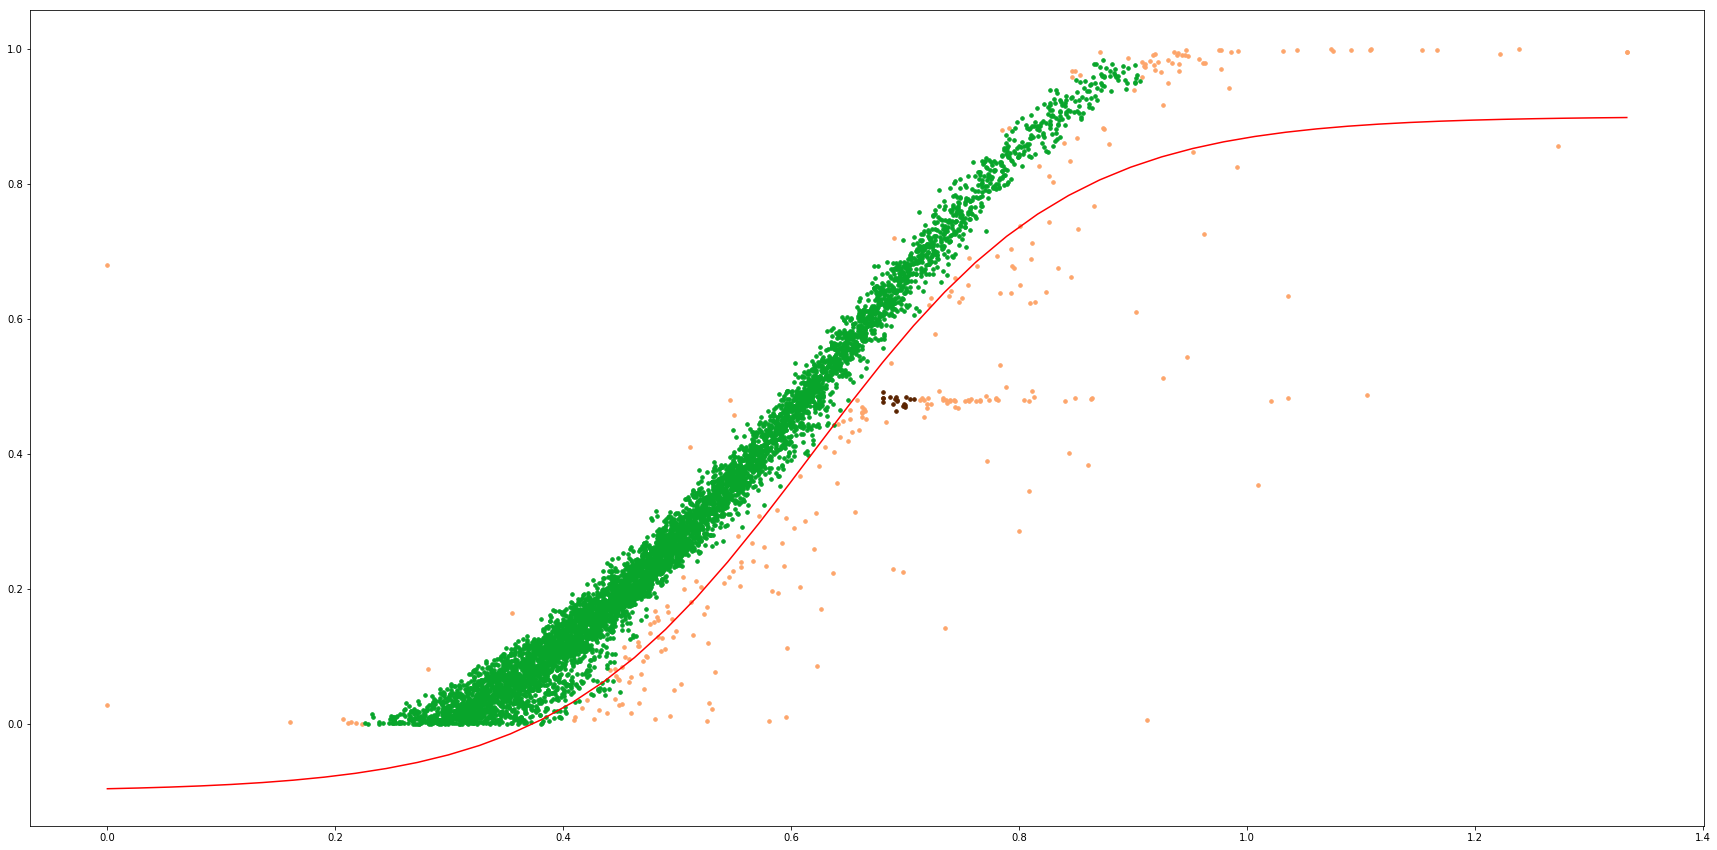

ScatterData_Burgula_B-516.csv


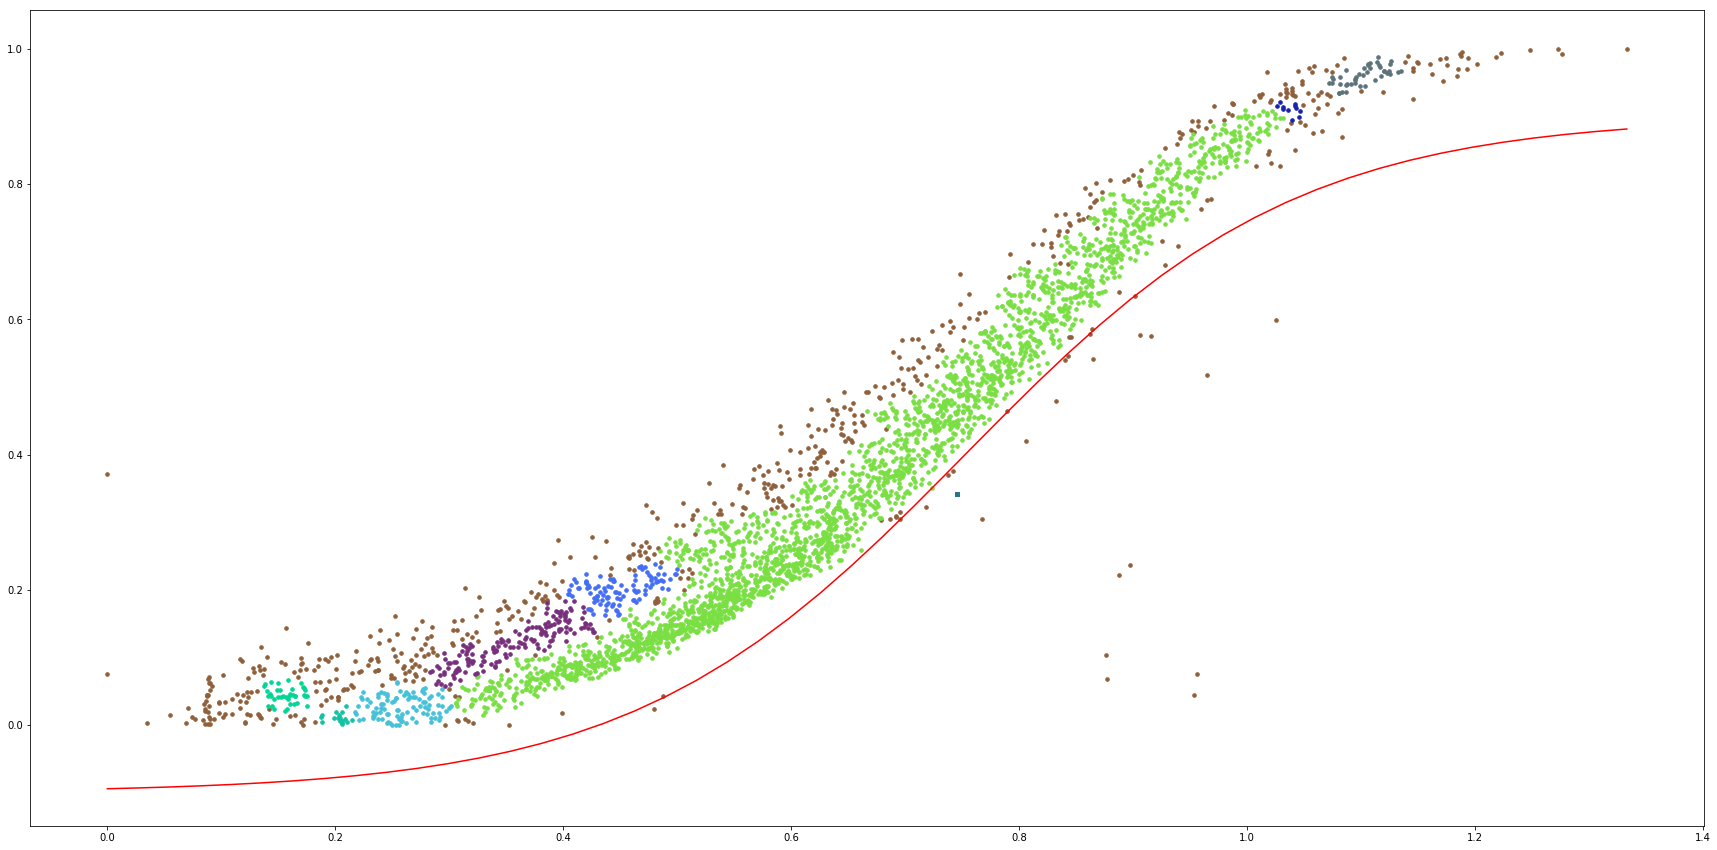

In [2]:
from os import listdir
from os.path import isfile, join

data_path = '/home/mytrah-pc/Mytrah_Adithya/data_turbine/'
for f in listdir(data_path):
    print f
    test(f)